In [7]:
#Importing the libraries and data
import pandas as pd   
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
df = pd.read_csv("https://raw.githubusercontent.com/sAKHILAREDDY/DATA606_Akhila/main/Suicide%20Rates%20Overview%201985%20to%202016%20Data.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
#renaming the column names for convenience
df.columns = ['country', 'year', 'gender', 'age', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI_for_year',
                'gdp_for_year', 'gdp_per_capita', 'generation']

# Data Preprocessing : 

# Outlier Analysis 

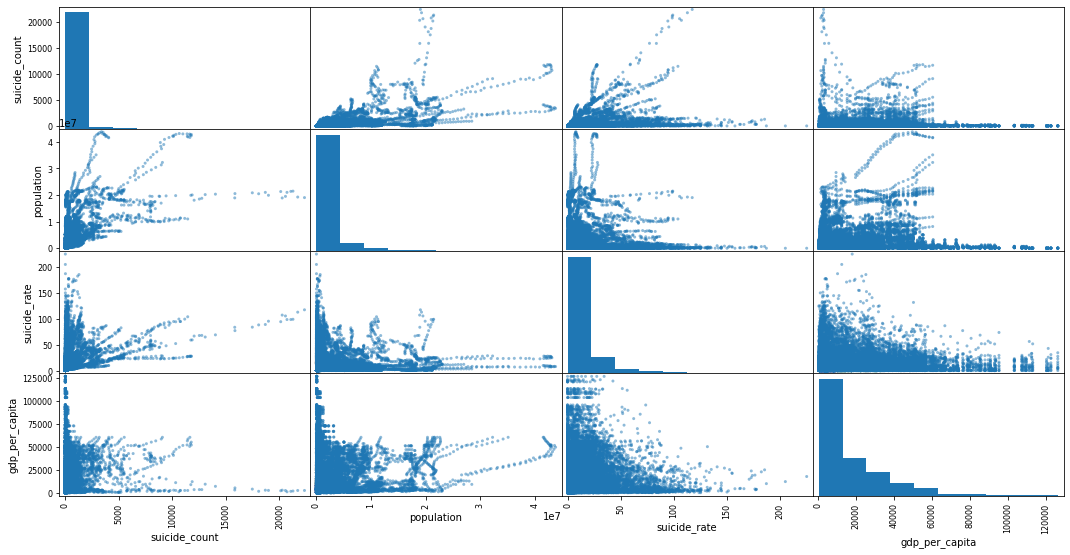

In [10]:
#Scatter Matrix to find outliers
from pandas.plotting import scatter_matrix
columns = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']
scatter_matrix(df[columns], figsize=(18,9))
plt.show()

In [11]:
#Calling out the continuous variables to remove their outliers 
CONTINUOUS = ['suicide_rate','gdp_per_capita']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


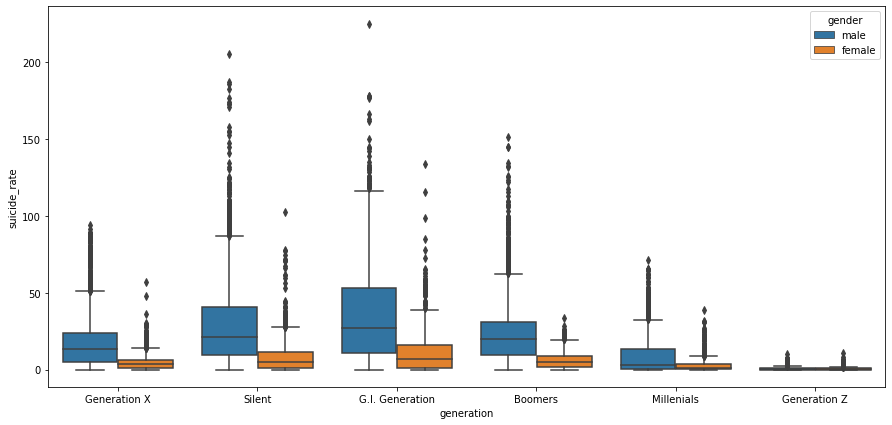

In [12]:
#boxplot before removing outliers 
plt.figure(figsize=(15,7))
sns.boxplot(df['generation'], df['suicide_rate'], hue=df['gender'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


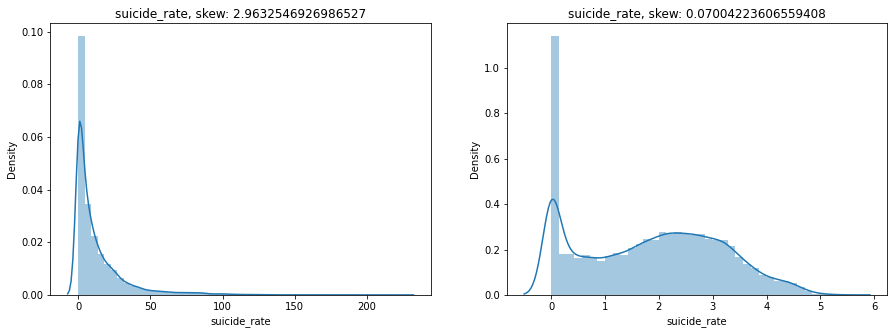

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


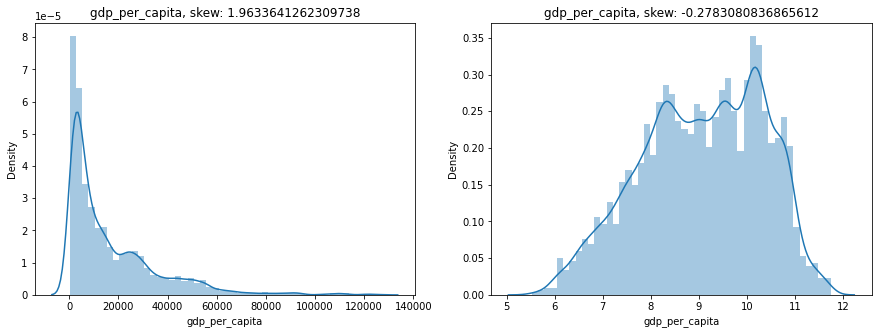

In [13]:
#Plots showing skew in suicides/100k pop, gdp_per_capita ($)
from scipy.stats import skew

for c in CONTINUOUS:
    skew_value = skew(df[c].dropna())
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(df[c], ax=ax[0])
    ax[0].set_title(f'{c}, skew: {skew_value}')
    if abs(skew_value) >= 0.6:
        new_skew_value = skew(np.log1p(df[c]).dropna())
        new_serie = np.log1p(df[c])
        sns.distplot(new_serie, ax=ax[1])
        ax[1].set_title(f'{c}, skew: {new_skew_value}')
        df[c] = new_serie
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


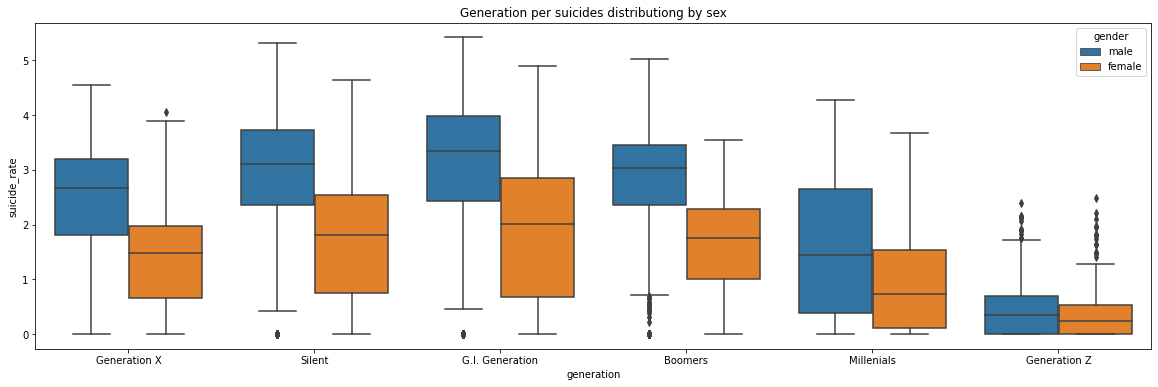

In [15]:
#boxplot after removing outliers 
plt.figure(figsize=(20,6))
sns.boxplot(df['generation'], df['suicide_rate'], hue=df['gender'])
plt.title("Generation per suicides distributiong by sex")
plt.show()

In [ ]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,1.851734,0.776601,9.066914
std,8.469055,902.047917,3.911779e+06,1.298485,0.093367,1.267618
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,5.529429
25%,1995.000000,3.000000,9.749850e+04,0.652325,0.713000,8.145550
50%,2002.000000,25.000000,4.301500e+05,1.944481,0.779000,9.145588
75%,2008.000000,131.000000,1.486143e+06,2.869035,0.855000,10.121619
max,2016.000000,22338.000000,4.380521e+07,5.420402,0.944000,11.746835


In [17]:
df1=df.drop(['country-year','HDI_for_year'], axis = 1) 
df1.head(1)

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,2.042518,"2,156,624,900",6.680855,Generation X


In [19]:
df1['gdp_for_year'] = df1['gdp_for_year'].str.replace(',','').astype(float) #To convert the column into float

Country, year, sex, age and generation are all non-numerical labeled columns that will be transformed to numerical labels using SkLearn's LabelEncoder.

In [20]:
import sklearn
from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','gender','age', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    df1[column] = le.fit_transform(df1[column])

In [21]:
df2 = df1.copy()
df2.head(5)

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,2.042518,2.156625e+09,6.680855,2
1,0,2,1,2,16,308000,1.822935,2.156625e+09,6.680855,5
2,0,2,0,0,14,289700,1.763017,2.156625e+09,6.680855,2
3,0,2,1,5,1,21800,1.720979,2.156625e+09,6.680855,1
4,0,2,1,1,9,274300,1.453953,2.156625e+09,6.680855,0


Many machine learning estimators need dataset standardization: if the individual features do not resemble standard normally distributed data, they may perform poorly.
SkLearn's RobustScaler is used to normalize the numerical columns population, gdp_for_year, and gdp_per_capita

In [22]:
numerical = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
df2[numerical] = rc.fit_transform(df2[numerical])

In [23]:
df2.head(1)

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.03125,-0.084435,0.044227,-0.182942,-1.247291,2


# Separating the targets from the predictors and creating the train test split

In [24]:
X = df2.drop('suicide_rate',axis=1)
y = df2['suicide_rate']
X.shape, y.shape

((27820, 9), (27820,))

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
X_train.shape, X_test.shape

((22256, 9), (5564, 9))

# K-Nearest Neighbors Regression Model:

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [27]:
#To check best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 2, 'weights': 'distance'}


In [28]:
#predicting the target value
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

## Performance Evaluation :

In [29]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.771

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.2787223308054932


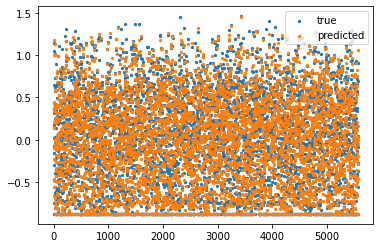

In [30]:
#True vs predicted 
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_test_knn,label='predicted',s=5)
plt.legend()
plt.show()

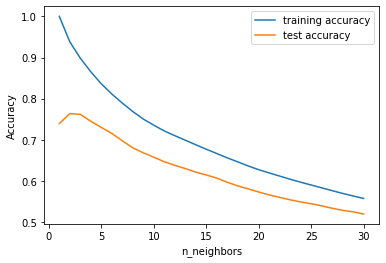

In [31]:
#Training&TestingAccuracy
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

Overfitting is seen by the difference in performance between the training and testing sets. The performance isn't as good, we can move on to the next models.

## Storing Results : 

In [32]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

In [33]:
#storing the results.
storeResults('K-NearestNeighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

# Decision Tree Regression Model:

In [34]:
from sklearn.tree import DecisionTreeRegressor
# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [35]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

### Performance Evaluation:

In [36]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.974
Decision Tree: Accuracy on test Data: 0.967

Decision Tree: The RMSE of the training set is: 0.09533832292066695
Decision Tree: The RMSE of the testing set is: 0.10498065022866536


The performance of the model is considerably higher when compared to K Nearest Neighbor Regression.

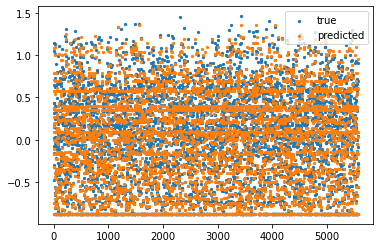

In [37]:
#True vs Predicted
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_test_tree,label='predicted',s=5)
plt.legend()
plt.show()

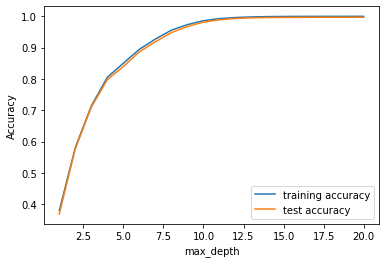

In [38]:
#Training&TestingAccuracy
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

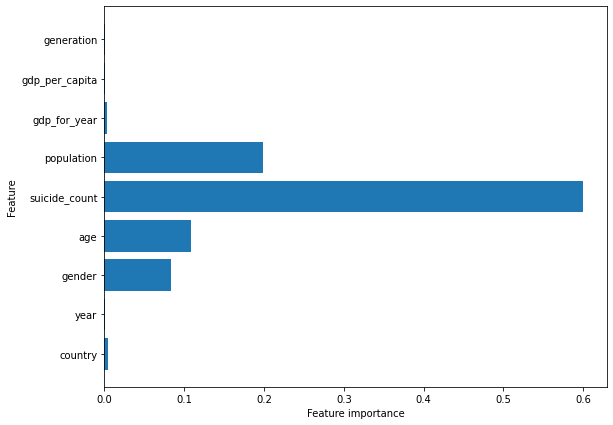

In [39]:
#Checking which features impact the target variable - "suicide_rate" the most in Decision tree model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [40]:
#storing the results.
storeResults('Decision Tree Regression', acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

# Random Forest Regression Model:

In [42]:
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [43]:
#predicting the target value
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

## Performance Evaluation : 

In [44]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.990
Random Forest: Accuracy on test Data: 0.988

Random Forest: The RMSE of the training set is:  0.05810223214955148
Random Forest: The RMSE of the testing set is:  0.06338194283023178


 The random forest achieves a 98.9 percent accuracy, which is superior to K nearest or decision tree models.

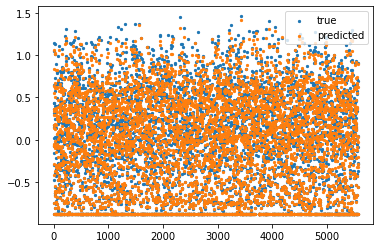

In [45]:
#True vs Predicted
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_test_forest,label='predicted',s=5)
plt.legend()
plt.show()

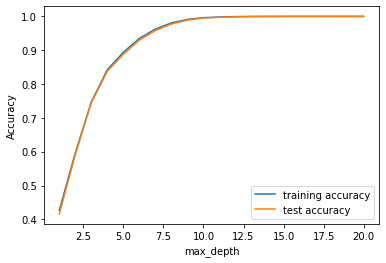

In [46]:
#Training&TestingAccuracy
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

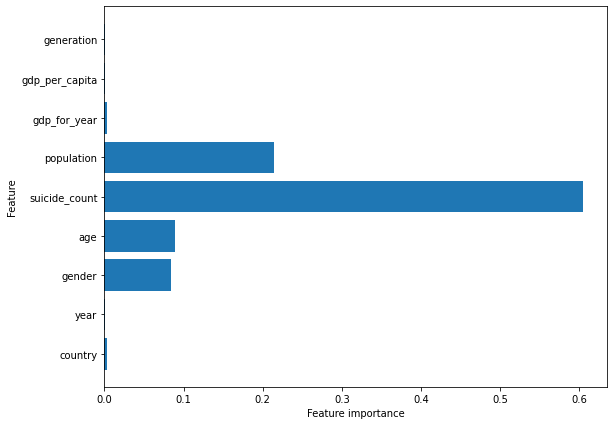

In [47]:
#Checking which features impact the target variable - "Suicide_rate" the most in Random forest model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [48]:
#storing the results.
storeResults('Random Forest Regression', acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

# XGBoost Regression Model :

In [49]:
#XGBoost Regression model
from xgboost import XGBRegressor

# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
#fit the model
xgb.fit(X_train, y_train)

[20:11:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=4)

In [50]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

## Performance Evaluation:

In [51]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.998
XGBoost Regression: Accuracy on test Data: 0.997

XGBoost Regression: The RMSE of the training set is:  0.026658853705386124
XGBoost Regression: The RMSE of the testing set is:  0.029502304888692835


The XGBoost Regression has demonstrated the highest accuracy and least RMSE so far of 0.997 and 0.029 respectively.

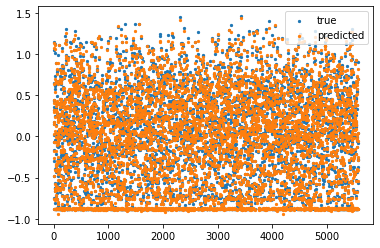

In [52]:
#True vs Predicted
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_test_xgb,label='predicted',s=5)
plt.legend()
plt.show()

[20:11:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

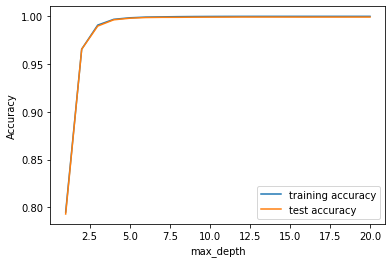

In [53]:
#Training&TestingAccuracy
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  xgb = XGBRegressor(max_depth=n)
  xgb.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(xgb.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(xgb.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

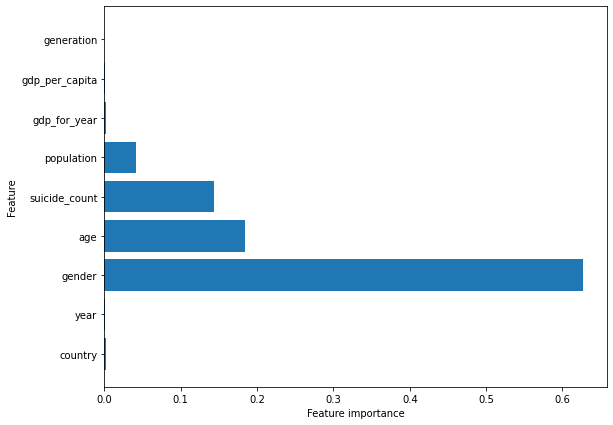

In [54]:
#Checking which features impact the target variable - "Suicide_rate" the most in XG boost regression model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [55]:
#storing the results.
storeResults('XGBoost Regression', acc_train_xgb, acc_test_xgb, rmse_train_xgb, rmse_test_xgb)

# Multilayer Perceptrons (Deep Learning) :



In [57]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=[100, 100])

In [58]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

## Performance Evaluation:

In [60]:
#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.883
Multilayer Perceptron Regression: Accuracy on test Data: 0.887

Multilayer Perceptron Regression: The RMSE of the training set is:  0.20096026975468514
Multilayer Perceptron Regression: The RMSE of the testing set is:  0.19548286333479203


This model gave us an accuracy of 88.7% which is lower compared to XGBoost regression.

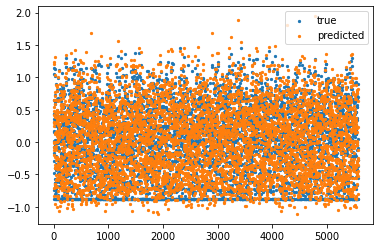

In [61]:
#True vs Predicted
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_test_mlp,label='predicted',s=5)
plt.legend()
plt.show()

In [62]:
#storing the results.
storeResults('Multilayer Perceptron Regression', acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

# Model Comparision : 

In [64]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [65]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
3,XGBoost Regression,0.998,0.997,0.027,0.030
2,Random Forest Regression,0.990,0.988,0.058,0.063
1,Decision Tree Regression,0.974,0.967,0.095,0.105
4,Multilayer Perceptron Regression,0.883,0.887,0.201,0.195
0,K-NearestNeighbors Regression,1.000,0.771,0.000,0.279


Among all the trained models, XGBoost has the highest accuracy and lowest RMSE. This is because XGBoost is very good in execution Speed & model performance.

# **REFERENCES :**

1.	Sahana Das , “Studying Suicide Rates from 1985 to 2016 : Prediction using Machine Learning”, Medium, October 2019.
2.	Shreya Gopal , “Suicide Rate Prediction with Machine Learning”, May 2020.
3.	VaibhavBichav, “Suicide Rate Prediction with Machine Learning”, November 2021.
4.	RithikaJ, “Suicide Rate Analysis” , July 2021.
5.	Tejrupsai , “Suicide_rate_prediction”, January 2021.
